# Assignment 1 - Part 3

Plotting

In [102]:
import matplotlib.pyplot as plt
BASELINE = "data/baseline.txt"  # file with the document rankings
IMPROVED = "data/mlm_improved.txt"
QRELS_FILE = "data/qrels2.csv"  # file with the relevance judgments (ground truth)

In [103]:
def eval_query(rankings, gt):
    ap = 0
    num_rel = 0
    for i, ranking in enumerate(rankings):
        if ranking in gt:
            num_rel += 1
            pi = num_rel / (i + 1)
            ap += pi
    ap /= len(gt)
    return {"AP": ap}
    

In [104]:
def eval(gt_file, output_file):
    # load data from ground truth file
    gt = {}  # holds a list of relevant documents for each queryID
    with open(gt_file, "r") as fin:
        header = fin.readline().strip()
        if header != "queryID,docIDs":
            raise Exception("Incorrect file format!")
        for line in fin.readlines():
            qid, docids = line.strip().split(",")
            gt[qid] = docids.split()
            
    # load data from output file
    output = {}
    with open(output_file, "r") as fin:
        header = fin.readline().strip()
        if header != "QueryId,DocumentId":
            raise Exception("Incorrect file format!")
        for line in fin.readlines():
            qid, docid = line.strip().split(",")
            if qid not in output:
                output[qid] = []
            output[qid].append(docid)
    
    # evaluate each query that is in the ground truth
    sum_ap = 0
    ap = []
    for qid in sorted(gt.keys()):
        res = eval_query(output.get(qid, []), gt.get(qid, []))
        ap.append(res["AP"])
    return ap

### Main

[-0.0601, -0.0007, 0.0082, 0.0, 0.0, 0.0001, 0.4714, -0.0769, -0.0005, 0.0, -0.0119, 0.0, -0.0266, 0.057, -0.009, -0.0002, 0.0, 0.0734, 0.0165, 0.0, 0.0048, 0.0103, 0.0, -0.0154, -0.002, -0.0331, 0.0121, -0.0079, -0.0024, 0.1271, 0.1517, 0.0164, 0.0025, 0.0025, 0.0749, 0.0, -0.0522, 0.0025, 0.0063, -0.0016, -0.0364, 0.0, 0.0, -0.017, 0.0775]


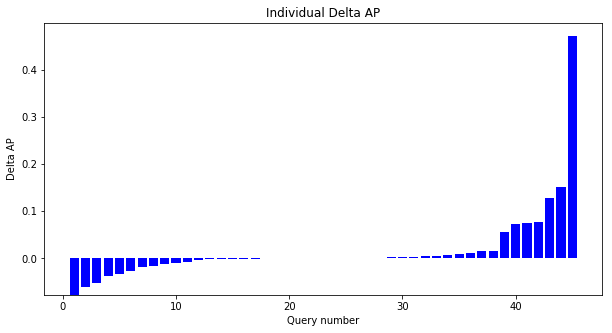

In [105]:
improved_ap = eval(QRELS_FILE, IMPROVED)
baseline_ap = eval(QRELS_FILE, BASELINE)
dap = []
for improved, baseline in zip(improved_ap, baseline_ap):
    dap.append(round(improved - baseline, 4))
print(dap)

for i, delta in enumerate(sorted(dap)):
    plt.bar(i+1, delta, color="blue")
plt.title("Individual Delta AP")
plt.xlabel('Query number')
plt.ylabel('Delta AP')
plt.show()
#eval(QRELS_FILE, RANKING_FILE)

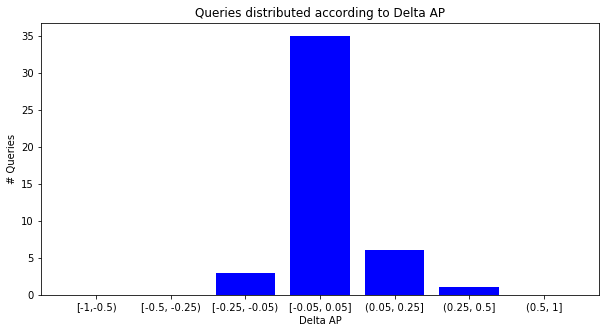

In [106]:
bins = [0, 0, 0, 0, 0, 0, 0]
for num  in dap:
    if num >= -1.0 and num < -0.5:
        bins[0] += 1
    elif num >= -0.5 and num < -0.25:
        bins[1] += 1
    elif num >= -0.25 and num < -0.05:
        bins[2] += 1
    elif num >= -0.05 and num < 0.05:
        bins[3] += 1
    elif num >= 0.05 and num < 0.25:
        bins[4] += 1
    elif num >= 0.25 and num < 0.50:
        bins[5] += 1
    elif num >= 0.5 and num < 1.0:
        bins[6] += 1

x = ["[-1,-0.5)", "[-0.5, -0.25)", "[-0.25, -0.05)", "[-0.05, 0.05]", "(0.05, 0.25]", "(0.25, 0.5]", "(0.5, 1]"]
for i, bin in enumerate(bins):
    plt.bar(i, bin, align="center", color="blue")
plt.xticks([0, 1, 2, 3, 4, 5, 6], x)
plt.title("Queries distributed according to Delta AP")
plt.ylabel("# Queries")
plt.xlabel("Delta AP")
plt.rcParams["figure.figsize"] = [10, 5] #Had to adjust figure size for it to display properly
plt.show()
